# Computing XOR using matrix notation

In the previous section, we have tried to calculate the XOR function using a hidden layer. We had 9 parameters to adjust. As neural networks grow more complex, we need to look for ways to simplify things:-

We can take input as a vector:-

$$X=
\begin{bmatrix}
  x_1 \\ x_2 
 \end{bmatrix}$$
 
First layer weights:-

$$W^1=
\begin{bmatrix}
w^1_{11} & w^1_{12} \\
w^1_{21} & w^1_{22}
\end{bmatrix}$$

First layer biases:-

$$b^1=
\begin{bmatrix}
b^1_1 \\ b^1_2
\end{bmatrix}$$

Hidden layer summation:-

$$z^1 = W^1 X + b^1$$

Hidden layer output:-

$$a^1=\sigma(W^1 X + b^1)$$

Likewise, we have for output layer:-

$$a=\sigma(W^2 a^1 + b^2)$$

Now, we calculate the gradients again. Only the final formalae are given. You can work out the numbers manually from the non-matrix segment to obtain these formulae. 

$\odot$ refers to element-wise multiplication, $I$ a unit matrix(a matrix with all 1s) and $T$ refers to matrix transpose.

$$\frac{\partial C}{\partial b_2} = (a-e) \odot a \odot (I-a)$$

$$\frac{\partial C}{\partial W_2} = [(a-e) \odot a \odot (I-a)] . (a^1)^T$$

$$\frac{\partial C}{\partial b_1} = (W^2 . \frac{\partial C}{\partial b_2}) \odot a^1 \odot (1-a^1)$$

$$\frac{\partial C}{\partial W_1} = [(W^2 . \frac{\partial C}{\partial b_2}) \odot a^1 \odot (1-a^1)] . X^T$$

Let us implement it in code:-

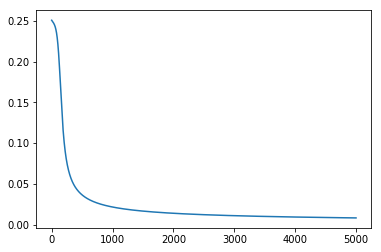

[[0]
 [0]] [[ 0.01663511]]
[[0]
 [1]] [[ 0.98105624]]
[[1]
 [0]] [[ 0.98438163]]
[[1]
 [1]] [[ 0.01476493]]


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

errors = []
w1 = np.random.randn(2,2)
w2 = np.random.randn(1,2)
b1 = np.random.randn(2,1)
b2 = np.random.randn(1,1)

inpList = [[0,0], [0,1], [1,0], [1,1]]
outpList = [[0], [1], [1], [0]]

error = 1000

for i in range(5000):
    error = 0
    del_w1 = np.zeros(w1.shape)
    del_w2 = np.zeros(w2.shape)
    del_b1 = np.zeros(b1.shape)
    del_b2 = np.zeros(b2.shape)
    
    for i in range(4):
        a0 = np.array([inpList[i]]).T
        e0 = np.array([outpList[i]])
        z1 = np.dot(w1, a0) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        error += (0.5 * np.linalg.norm(a2-e0))
        
        d2 = (a2 - e0) * a2 * (1-a2)
        del_b2 += d2
        del_w2 += np.dot(d2, a1.T) 
        d1 = np.dot(w2.T, d2) * a1 * (1-a1)
        del_b1 += d1
        del_w1 += np.dot(d1, a0.T)
    
    error /= 4.0
    errors.append(error)
    w1 -= del_w1
    b1 -= del_b1
    w2 -= del_w2
    b2 -= del_b2
    
plt.plot(errors)
plt.show()
for i in range(4):
    a0 = np.array([inpList[i]]).T
    e0 = np.array([outpList[i]])
    z1 = np.dot(w1, a0) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    print a0, a2

We pretty much get the same results with a more compact code. Note the use of backpropogation where we use the gradients in the forward layer to compute the gradients in the layer behind it.